# Mini Projet

### Le Pendule

### Approximation des petits angles

L'équation du mouvement libre d'un pendule simple s'écrit : 
$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$


Pour les petits angle on peut simplifier :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0 $$

Avec $\theta$ l'angle entre le pendule et la verticale

 $\Omega=\sqrt{{g/l}}$  la pulsation propre

$q$ est le terme de frottement fluide. 

 On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$.

On cherhce à résoudre l'équation différentielle simplifié du pendule simple à l'aide de la méthode $RK4$ pour trois valeurs de l'amortissement $q_{1}=1 s^{-1}$, $q_{2}=2 s^{-1}$, $q_{3}=5 s^{-1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pas de temps
step = 0.05

#durée
start = 0
end = 20

#valeur initiale
theta0 = np.radians(10)
dtheta0 = 0
y0 = [theta0, dtheta0]

#pulsation propre 
omega = 1

#amortissement
q = [0.5, 1, 2, 5]

In [3]:
def equation_pendule (t, y, q, omega):
    theta, dtheta = y
    dydt = [dtheta, -q * dtheta - omega**2 * theta]
    return dydt   

In [4]:
def RK4_pendule (start, end, step, y0, q, omega):
    
    interval = end - start              
    num_points = int(interval / step) + 1      
    t = np.linspace(start, end, num_points)
    
    y = np.empty((len(y0), num_points))
    y[:, 0] = y0
    
    for i in range (1, num_points):
        d1 = step * np.array(equation_pendule(t[i-1], y[:, i-1], q, omega))
        d2 = step * np.array(equation_pendule(t[i-1] + 0.5*step, y[:, i-1] + 0.5*d1, q, omega))
        d3 = step * np.array(equation_pendule(t[i-1] + 0.5*step, y[:, i-1] + 0.5*d2, q, omega))
        d4 = step * np.array(equation_pendule(t[i-1] + step, y[:, i-1] + d3, q, omega))
        y[:, i] = y[:, i-1] + (d1 + 2*d2 + 2*d3 + d4)/6
        
    return t, y

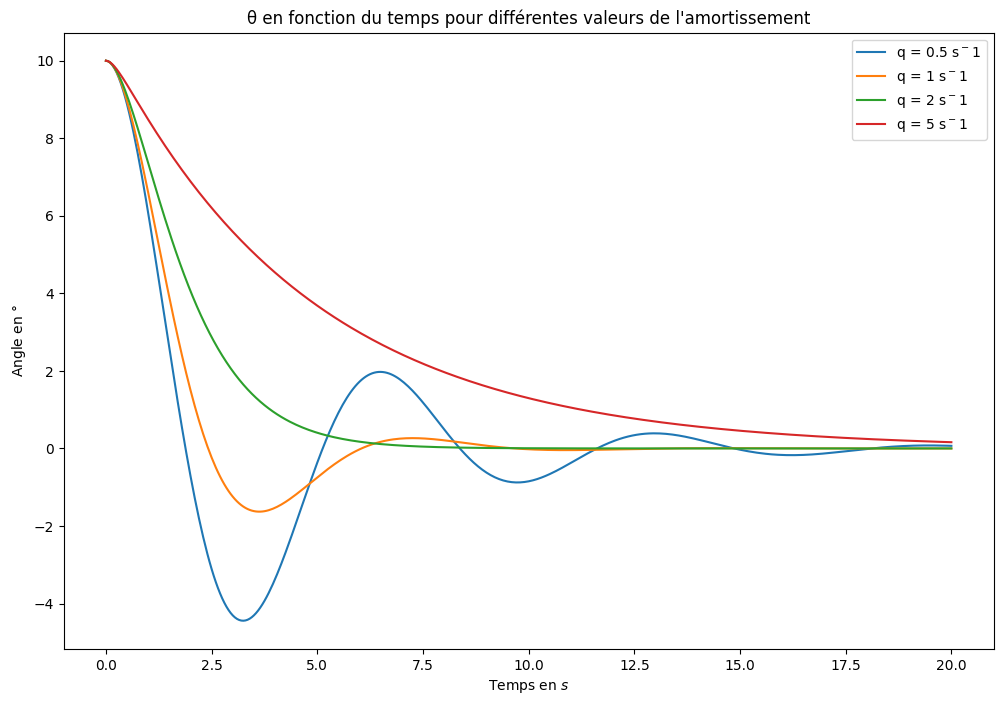

In [5]:
plt.figure(figsize=(12,8))
for i in q:
    t,y = RK4_pendule (start, end, step, y0, i, omega)
    plt.plot(t, np.degrees(y[0]), label=f'q = {i} s$^{-1}$')

plt.xlabel('Temps en $s$')
plt.ylabel('Angle en $°$')
plt.title('θ en fonction du temps pour différentes valeurs de l\'amortissement')
plt.legend()
plt.show()

On remarque plus $q$ est petit plus $\theta$ décroit rapidement. Lorsque $q$ est inférieur à $2$ dans notre cas on observe des $\theta$ négatifs. Plus $q$ est grand plus $\theta$ est amorti.

### Exitation du pendule

On exite maintenant le pendule avec une force $F_{e}$ :
$$\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t)$$

Avec la force d'exitation d'intensité $F_{e} = 1$  $rad.s^{-2}$ et sa pulsation $\Omega_e=\frac{2\Omega}{3}$

In [6]:
#paramètre du pendule
Fe = 1
omega_e = (2*omega)/3

In [7]:
def equation_pendule_exité (t, y, q, omega, Fe, omega_e):
    theta, dtheta = y
    dydt = [dtheta, -q * dtheta - omega**2 * theta + Fe * np.sin(omega_e*t)]
    return dydt   

In [8]:
def RK4_pendule_exité (start, end, step, y0, q, omega, Fe, omega_e):
    
    interval = end - start              
    num_points = int(interval / step) + 1      
    t = np.linspace(start, end, num_points)
    
    y = np.empty((len(y0), num_points))
    y[:, 0] = y0
    
    for i in range (1, num_points):
        d1 = step * np.array(equation_pendule_exité(t[i-1], y[:, i-1], q, omega, Fe, omega_e))
        d2 = step * np.array(equation_pendule_exité(t[i-1] + 0.5*step, y[:, i-1] + 0.5*d1, q, omega, Fe, omega_e))
        d3 = step * np.array(equation_pendule_exité(t[i-1] + 0.5*step, y[:, i-1] + 0.5*d2, q, omega, Fe, omega_e))
        d4 = step * np.array(equation_pendule_exité(t[i-1] + step, y[:, i-1] + d3, q, omega, Fe, omega_e))
        y[:, i] = y[:, i-1] + (d1 + 2*d2 + 2*d3 + d4)/6
        
    return t, y

In [9]:
t_1,y_1 = RK4_pendule_exité (start, end, step, y0, 0, omega, 0, omega_e)
t_2,y_2 = RK4_pendule_exité (start, end, step, y0, 1, omega, 0, omega_e)
t_3,y_3 = RK4_pendule_exité (start, end, step, y0, 1, omega, Fe, omega_e)

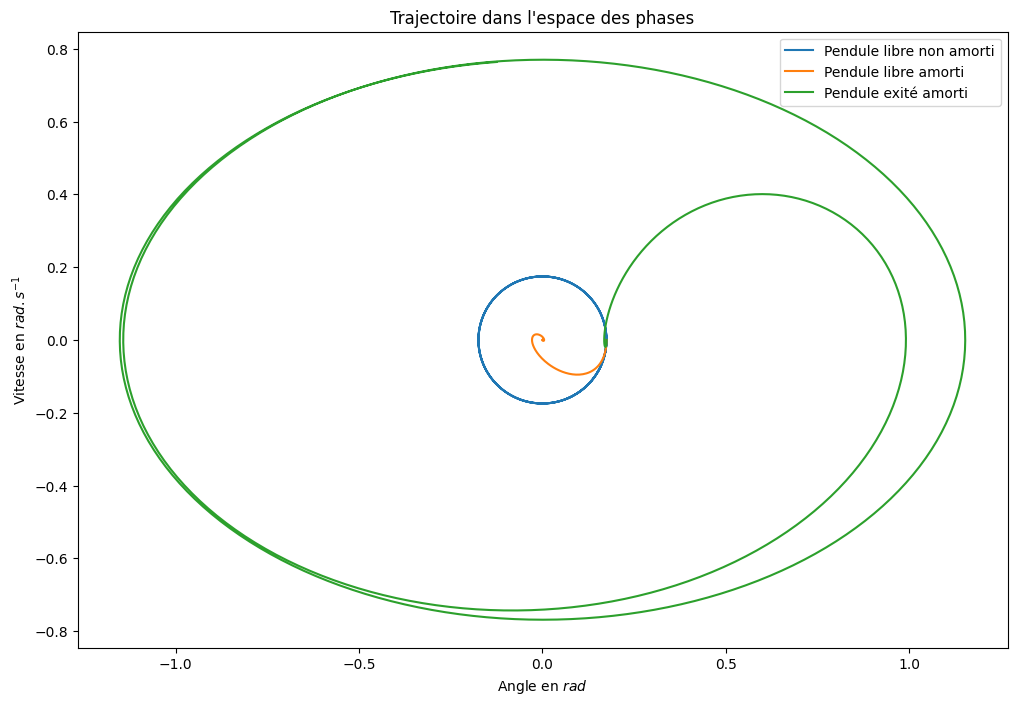

In [10]:
plt.figure(figsize=(12,8))
plt.plot(y_1[0], y_1[1], label = 'Pendule libre non amorti')
plt.plot(y_2[0], y_2[1], label = 'Pendule libre amorti')
plt.plot(y_3[0], y_3[1], label = 'Pendule exité amorti')
plt.xlabel('Angle en $rad$')
plt.ylabel('Vitesse en $rad.s^{-1}$')
plt.title('Trajectoire dans l\'espace des phases')
plt.legend()

Dans le cas du pendule libre non amorti on voit que la trajectoire est un cercle comme on l'attendait. Pour le pendule exité amorti la trajectoire qui débute en spirale se stabile en une ellipse.

### Mouvement Chaotique

In [11]:
Fe_chaos = [1.4, 1.44, 1.465, 1.5]

In [12]:
def equation_pendule_chaotique (t, y, q, omega, Fe, omega_e):
    theta, dtheta = y
    dydt = [dtheta, -q * dtheta - omega**2 * np.sin(theta) + Fe * np.sin(omega_e*t)]
    return dydt   

In [13]:
def RK4_pendule_chaotique (start, end, step, y0, q, omega, Fe, omega_e):
    
    interval = end - start              
    num_points = int(interval / step) + 1      
    t = np.linspace(start, end, num_points)
    
    y = np.empty((len(y0), num_points))
    y[:, 0] = y0
    
    for i in range (1, num_points):
        d1 = step * np.array(equation_pendule_chaotique(t[i-1], y[:, i-1], q, omega, Fe, omega_e))
        d2 = step * np.array(equation_pendule_chaotique(t[i-1] + 0.5*step, y[:, i-1] + 0.5*d1, q, omega, Fe, omega_e))
        d3 = step * np.array(equation_pendule_chaotique(t[i-1] + 0.5*step, y[:, i-1] + 0.5*d2, q, omega, Fe, omega_e))
        d4 = step * np.array(equation_pendule_chaotique(t[i-1] + step, y[:, i-1] + d3, q, omega, Fe, omega_e))
        y[:, i] = y[:, i-1] + (d1 + 2*d2 + 2*d3 + d4)/6
        
        #correction
        if y[0, i] > np.pi:
            y[0, i] -= 2 * np.pi
        elif y[0, i] < -np.pi:
            y[0, i] += 2 * np.pi
        
    return t, y

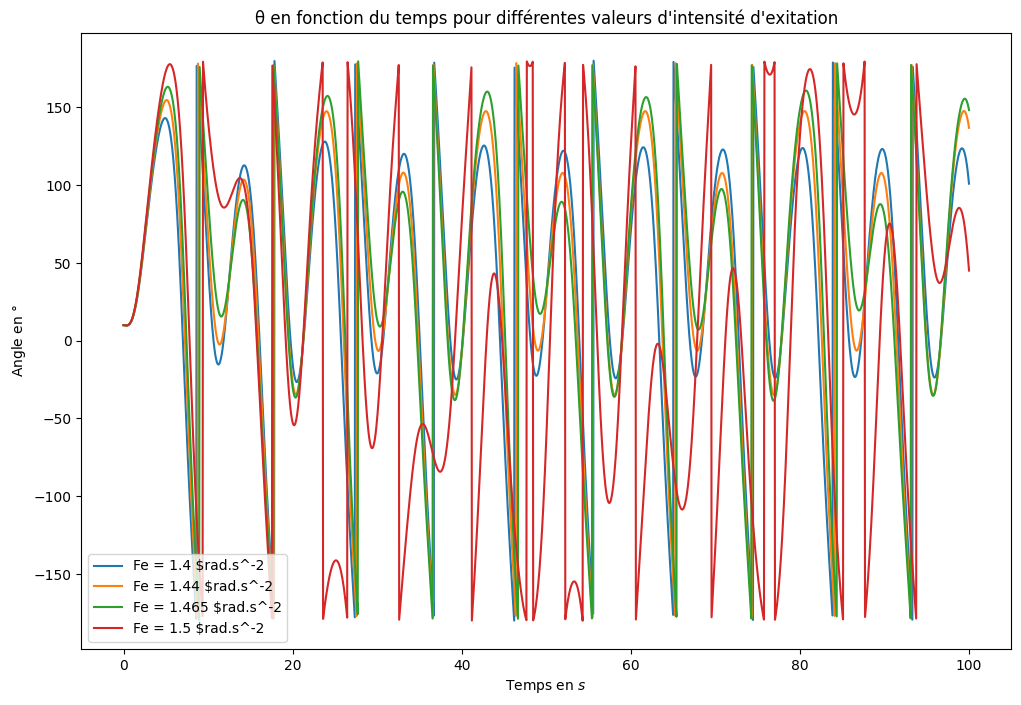

In [14]:
plt.figure(figsize=(12,8))
for i in Fe_chaos:
    t,y = RK4_pendule_chaotique (start, 100, step, y0, 0.5, omega, i, omega_e)
    plt.plot(t, np.degrees(y[0]), label=f'Fe = {i} $rad.s^{-2}')

plt.xlabel('Temps en $s$')
plt.ylabel('Angle en $°$')
plt.title('θ en fonction du temps pour différentes valeurs d\'intensité d\'exitation')
plt.legend()
plt.show()

On remarque que pour des temps petits les angles on une évolution similaire, mais plus le temps passe plus ils sécartent, le système est chaotique. Pour les 3 premières valeur de $F_{e}$ on remarque que la période ne change pas.

In [15]:
#faible variation de theta initiale
theta0_2 = np.radians(9.999)

In [16]:
t, yc_1 = RK4_pendule_chaotique (start, 100, step, y0, 0.5, omega, 1.5, omega_e)
t, yc_2 = RK4_pendule_chaotique (start, 100, step, [theta0_2, dtheta0], 0.5, omega, 1.5, omega_e)

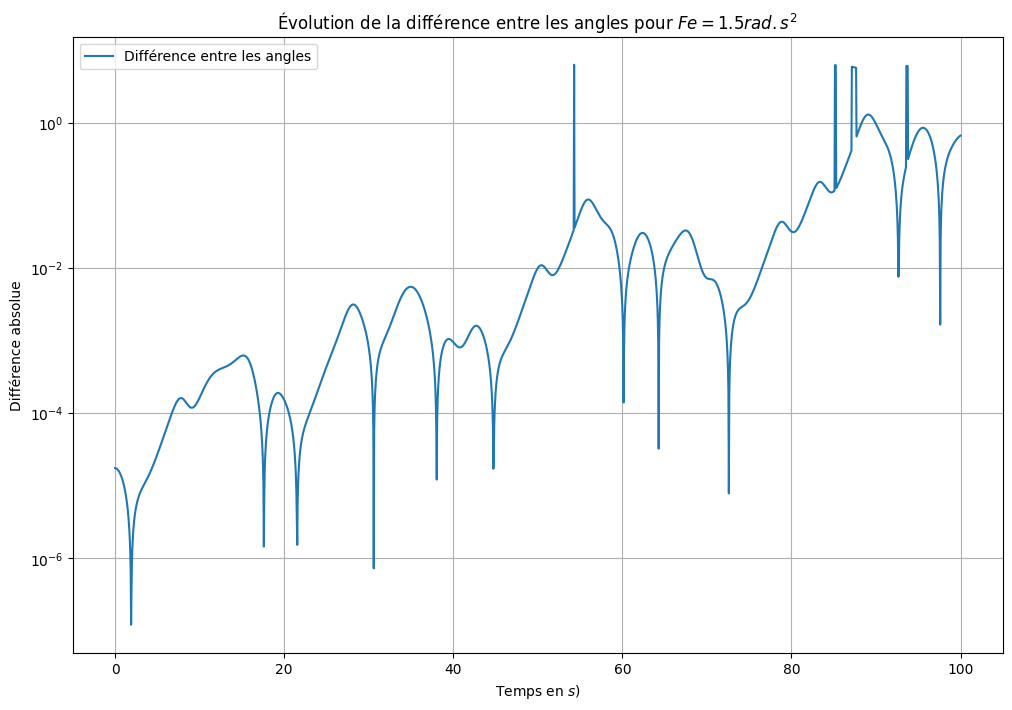

In [17]:
plt.figure(figsize=(12,8))
plt.grid()
plt.semilogy(t, np.abs(yc_1[0] - yc_2[0]), label='Différence entre les angles')
plt.xlabel('Temps en $s$)')
plt.ylabel('Différence absolue')
plt.title('Évolution de la différence entre les angles pour $Fe = 1.5 rad.s^{2}$')
plt.legend()

On remarque que pour une très faible variation initiale plus le temps passe plus la différence devient grande. Au bout de $100s$ la différence absolue à augmenté d'un facteur $10^{-6}$.